# EFIxTCT (Cross-track ion flow)

> Abstract: Access to the 2Hz & 16Hz cross-track ion flow data derived from the Thermal Ion Imager (TII), part of the Electric Field Instrument package (EFI).
> 
> For more information about this product, see the [release notes](https://earth.esa.int/eogateway/documents/20142/37627/swarm-EFI-TII-cross-track-flow-dataset-release-notes.pdf).

In [1]:
SERVER_URL = 'https://vires.services/ows'

In [2]:
# Display important package versions used
%load_ext watermark
%watermark -i -v -p viresclient,pandas,xarray,matplotlib

Python implementation: CPython
Python version       : 3.11.6
IPython version      : 8.18.0

viresclient: 0.11.6
pandas     : 2.1.3
xarray     : 2023.12.0
matplotlib : 3.8.2



In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
# Control the HTML display of the datasets
xr.set_options(display_expand_attrs=False, display_expand_coords=True, display_expand_data=True)

from viresclient import SwarmRequest

In [4]:
request = SwarmRequest(SERVER_URL)

## What data is available?

There are two sets of collections available, one for 2Hz and one for 16Hz, and for each there are three collections, one for each Swarm spacecraft.

In [5]:
request.available_collections("EFI_TCT02", details=False)

{'EFI_TCT02': ['SW_EXPT_EFIA_TCT02',
  'SW_EXPT_EFIB_TCT02',
  'SW_EXPT_EFIC_TCT02']}

In [6]:
request.available_collections("EFI_TCT16", details=False)

{'EFI_TCT16': ['SW_EXPT_EFIA_TCT16',
  'SW_EXPT_EFIB_TCT16',
  'SW_EXPT_EFIC_TCT16']}

In [7]:
print(request.available_measurements("EFI_TCT02"))

['VsatC', 'VsatE', 'VsatN', 'Bx', 'By', 'Bz', 'Ehx', 'Ehy', 'Ehz', 'Evx', 'Evy', 'Evz', 'Vicrx', 'Vicry', 'Vicrz', 'Vixv', 'Vixh', 'Viy', 'Viz', 'Vixv_error', 'Vixh_error', 'Viy_error', 'Viz_error', 'Latitude_QD', 'MLT_QD', 'Calibration_flags', 'Quality_flags']


In [8]:
print(request.available_measurements("EFI_TCT16"))

['VsatC', 'VsatE', 'VsatN', 'Bx', 'By', 'Bz', 'Ehx', 'Ehy', 'Ehz', 'Evx', 'Evy', 'Evz', 'Vicrx', 'Vicry', 'Vicrz', 'Vixv', 'Vixh', 'Viy', 'Viz', 'Vixv_error', 'Vixh_error', 'Viy_error', 'Viz_error', 'Latitude_QD', 'MLT_QD', 'Calibration_flags', 'Quality_flags']


As seen above, the variables available for both the 2Hz and 16Hz datasets are the same. Here is a short description for each variable:

In [9]:
tct_vars = [
    # Satellite velocity in NEC frame
    "VsatC", "VsatE", "VsatN",
    # Geomagnetic field components derived from 1Hz product
    #  (in satellite-track coordinates)
    "Bx", "By", "Bz",
    # Electric field components derived from -VxB with along-track ion drift
    #  (in satellite-track coordinates)
    # Eh: derived from horizontal sensor
    # Ev: derived from vertical sensor
    "Ehx", "Ehy", "Ehz",
    "Evx", "Evy", "Evz",
    # Ion drift corotation signal, removed from ion drift & electric field
    #  (in satellite-track coordinates)
    "Vicrx", "Vicry", "Vicrz",
    # Ion drifts along-track from vertical (..v) and horizontal (..h) TII sensor
    "Vixv", "Vixh",
    # Ion drifts cross-track (y from horizontal sensor, z from vertical sensor)
    #  (in satellite-track coordinates)
    "Viy", "Viz",
    # Random error estimates for the above
    #  (Negative value indicates no estimate available)
    "Vixv_error", "Vixh_error", "Viy_error", "Viz_error",
    # Quasi-dipole magnetic latitude and local time
    #  redundant with VirES auxiliaries, QDLat & MLT
    "Latitude_QD", "MLT_QD",
    # Refer to release notes link above for details:
    "Calibration_flags", "Quality_flags",
]

## Fetching and plotting data

For demonstration, we will fetch the 2Hz data from Swarm Alpha (`SW_EXPT_EFIA_TCT02`)

In [10]:
start = "2018-07-17T11:00:00"
end = "2018-07-17T16:00:00"

request = SwarmRequest(SERVER_URL)
request.set_collection("SW_EXPT_EFIA_TCT02")
request.set_products(measurements=tct_vars)
data = request.get_between(start, end)


Processing:    0%|          |  [ Elapsed: 00:00, Remaining: ? ] [1/1] 

Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (4.163MB)

Data can be loaded as either a pandas datframe or a xarray dataset.

In [11]:
df = data.as_dataframe()
df.head()

MLT_QD           Bx         Evy  Vixv_error  \
Timestamp                                                                       
2018-07-17 11:28:49.225250048  17.153055 -1941.897339 -866.204529  -14.849242   
2018-07-17 11:28:49.725250048  17.154737 -1947.693359 -848.451111  -14.849242   
2018-07-17 11:28:50.225250048  17.156416 -1954.192383 -868.396301  -14.849242   
2018-07-17 11:28:50.725250048  17.158089 -1961.238281 -868.061523  -14.849242   
2018-07-17 11:28:51.225250048  17.159754 -1969.732666 -864.288635  -14.849242   

                                  VsatC         Ehx   Latitude  Quality_flags  \
Timestamp                                                                       
2018-07-17 11:28:49.225250048  5.364018 -146.413574  80.104347              0   
2018-07-17 11:28:49.725250048  5.379858 -132.751846  80.073341              0   
2018-07-17 11:28:50.225250048  5.395653 -130.952698  80.042313              0   
2018-07-17 11:28:50.725250048  5.411411 -130.928070  80.011284              0   
2018-07-17 11:28:51.225250048  5.427133 -126.337891  79.980247              0   

                               Viy_error  Vixh_error  ...     Vicrz  \
Timestamp                                             ...             
2018-07-17 11:28:49.225250048 -14.849242  -14.849242  ... -0.658293   
2018-07-17 11:28:49.725250048 -14.849242  -14.849242  ... -0.661217   
2018-07-17 11:28:50.225250048 -14.849242  -14.849242  ... -0.664141   
2018-07-17 11:28:50.725250048 -14.849242  -14.849242  ... -0.667065   
2018-07-17 11:28:51.225250048 -14.849242  -14.849242  ... -0.669987   

                                     VsatE  Calibration_flags         Viz  \
Timestamp                                                                   
2018-07-17 11:28:49.225250048  1978.772949           50529027 -268.333466   
2018-07-17 11:28:49.725250048  1972.120605           50529027 -455.484985   
2018-07-17 11:28:50.225250048  1965.511353           50529027 -273.931030   
2018-07-17 11:28:50.725250048  1958.935791           50529027 -566.669189   
2018-07-17 11:28:51.225250048  1952.402100           50529027 -533.720764   

                                        By          Vixv        Ehz  \
Timestamp                                                             
2018-07-17 11:28:49.225250048 -2032.778809 -18097.832031 -35.943443   
2018-07-17 11:28:49.725250048 -2032.832520 -17717.505859 -34.868401   
2018-07-17 11:28:50.225250048 -2033.323975 -18140.265625 -34.975639   
2018-07-17 11:28:50.725250048 -2034.150879 -18119.716797 -34.792419   
2018-07-17 11:28:51.225250048 -2032.240967 -18040.589844 -34.930099   

                                      Ehy      Vicrx      Vicry  
Timestamp                                                        
2018-07-17 11:28:49.225250048 -705.941589 -19.133307  83.111824  
2018-07-17 11:28:49.725250048 -693.349854 -19.120062  83.386414  
2018-07-17 11:28:50.225250048 -697.077820 -19.106810  83.660973  
2018-07-17 11:28:50.725250048 -692.121216 -19.093546  83.935509  
2018-07-17 11:28:51.225250048 -700.008362 -19.080286  84.210022  

[5 rows x 31 columns]

In [12]:
ds = data.as_xarray()
ds

<xarray.Dataset>
Dimensions:            (Timestamp: 32535)
Coordinates:
  * Timestamp          (Timestamp) datetime64[ns] 2018-07-17T11:28:49.2252500...
Data variables: (12/31)
    Spacecraft         (Timestamp) object 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    MLT_QD             (Timestamp) float32 17.15 17.15 17.16 ... 4.772 4.772
    Bx                 (Timestamp) float32 -1.942e+03 -1.948e+03 ... 9.496e+03
    Evy                (Timestamp) float32 -866.2 -848.5 ... -720.4 -715.7
    Viy_error          (Timestamp) float32 -14.85 -14.85 ... -14.85 -14.85
    Bz                 (Timestamp) float32 4.783e+04 4.784e+04 ... 4.539e+04
    ...                 ...
    VsatN              (Timestamp) float32 -7.367e+03 -7.369e+03 ... 7.606e+03
    Vicrz              (Timestamp) float32 -0.6583 -0.6612 ... -0.7706 -0.7679
    VsatE              (Timestamp) float32 1.979e+03 1.972e+03 ... 619.0 620.2
    Calibration_flags  (Timestamp) uint32 50529027 50529027 ... 50529027
    Vicrx              (Timestamp) float32 -19.13 -19.12 ... -24.47 -24.46
    Vicry              (Timestamp) float32 83.11 83.39 83.66 ... -210.3 -210.1
Attributes: (3)

An example plot:

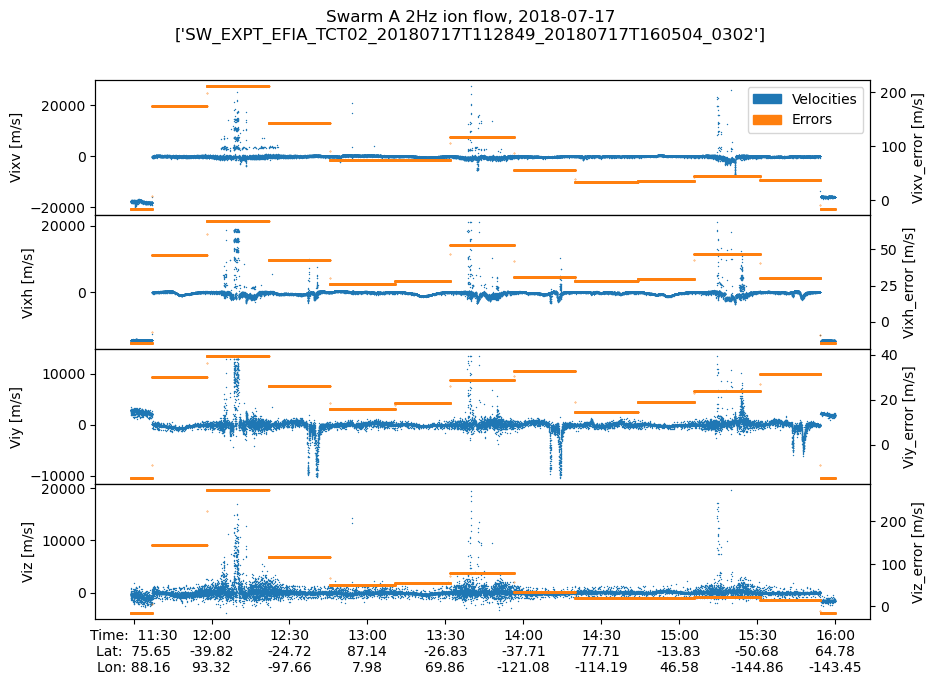

In [13]:
fig, axes = plt.subplots(nrows=4, sharex=True, figsize=(10, 7))
# Plot velocities with left axis
ds.plot.scatter(x="Timestamp", y="Vixv", ax=axes[0], s=1, linewidths=0)
ds.plot.scatter(x="Timestamp", y="Vixh", ax=axes[1], s=1, linewidths=0)
ds.plot.scatter(x="Timestamp", y="Viy", ax=axes[2], s=1, linewidths=0)
ds.plot.scatter(x="Timestamp", y="Viz", ax=axes[3], s=1, linewidths=0, label="Velocities")
# Plot velocities with right axis
axes_r = [ax.twinx() for ax in axes]
ds.plot.scatter(x="Timestamp", y="Vixv_error", ax=axes_r[0], s=0.1, color="tab:orange")
ds.plot.scatter(x="Timestamp", y="Vixh_error", ax=axes_r[1], s=0.1, color="tab:orange")
ds.plot.scatter(x="Timestamp", y="Viy_error", ax=axes_r[2], s=0.1, color="tab:orange")
ds.plot.scatter(x="Timestamp", y="Viz_error", ax=axes_r[3], s=0.1, color="tab:orange")
fig.subplots_adjust(hspace=0)
# Add legend to identify each side
blue = mpl.patches.Patch(color="tab:blue", label="Velocities")
orange = mpl.patches.Patch(color="tab:orange", label="Errors")
axes[0].legend(handles=[blue, orange])
# # Generate additional ticklabels for x-axis
# Use time xticks to get dataset vars at those xticks
locx = axes[-1].get_xticks()
times = mpl.dates.num2date(locx)
times = [t.replace(tzinfo=None) for t in times]
_ds_xticks = ds.reindex({"Timestamp": times}, method="nearest")
# Build ticklabels from dataset vars
xticklabels = np.stack([
    _ds_xticks["Timestamp"].dt.strftime("%H:%M").values,
    np.round(_ds_xticks["Latitude"].values, 2).astype(str),
    np.round(_ds_xticks["Longitude"].values, 2).astype(str),
])
xticklabels = ["\n".join(row) for row in xticklabels.T]
# Add labels to first xtick
_xt0 = xticklabels[0].split("\n")
xticklabels[0] = f"Time:  {_xt0[0]}\nLat:  {_xt0[1]}\nLon: {_xt0[2]}"
axes[-1].set_xticks(axes[-1].get_xticks())
axes[-1].set_xticklabels(xticklabels)
axes[-1].set_xlabel("")
# Adjust title
title = "".join([
    f"Swarm {ds['Spacecraft'].data[0]} 2Hz ion flow, ",
    ds["Timestamp"].dt.date.data[0].isoformat(),
    f"\n{ds.attrs['Sources']}"
])
fig.suptitle(title);

Due to contamination in the instrument, great care must be taken to use these data correctly. Check the release notes and make use of the `Quality_flags` variable to identify valid data periods.

TODO: use section 3.4.1.1 to identify untrusty periods (bitx = 0) and shade them grey?